In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


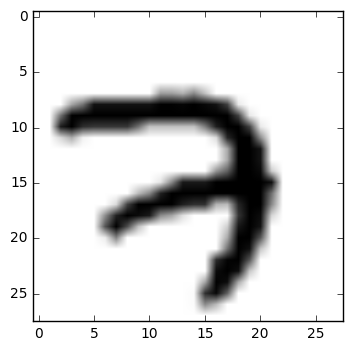

In [20]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

In [21]:
import tensorflow as tf

In [22]:
# The 1st dimension is the number of images,
# None 表示 images 的数目不定 
x = tf.placeholder(tf.float32, [None, 784])

In [23]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [24]:
# 注意和公式的定义有一个翻转，公式中，x 是一个向量，而这里 x 是个矩阵
# 这个小技巧很重要，相当于通过翻转把多个 矩阵向量 乘法转换成 矩阵矩阵 乘法
# 现在，y的shape是(? x 10)，第一维是image的数目，第二维才是label的数目
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [29]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [33]:
# this is numerically unstable as described in the web page
# consider using tf.nn.softmax_cross_entropy_with_logits instead
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [34]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [35]:
sess = tf.InteractiveSession()

In [36]:
tf.global_variables_initializer().run()

In [37]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [38]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [39]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [42]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9023
